In [9]:
#importando bibliotecas para análise e treinamento do modelo
from sklearn.datasets import load_breast_cancer 
from sklearn.datasets import load_diabetes 
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# response= natural_language_understanding.analyze(
#   text='Na FIAP, os alunos são muito dedicados.',
#   features=Features(
#     relations=RelationsOptions(),
#     concepts=ConceptsOptions(),
#     emotion=EmotionOptions(),
#     entities=EntitiesOptions(),
#     semantic_roles=SemanticRolesOptions(),
#     sentiment=SentimentOptions(),
#     ))
# print(json.dumps(response, indent=2))

In [3]:
#Carregando data set cancer e obtendo features e possiveis valores de target(alvo)
dt_cancer = load_breast_cancer()
dt_cancer.feature_names
dt_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
#Carregando data set diabetes e obtendo features e possiveis valores de target(alvo)
dt_diabetes = load_diabetes()
dt_diabetes.feature_names
dt_diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
#Separando dados de treino e teste
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(dt_cancer.data, dt_cancer.target, stratify=dt_cancer.target, random_state=42)



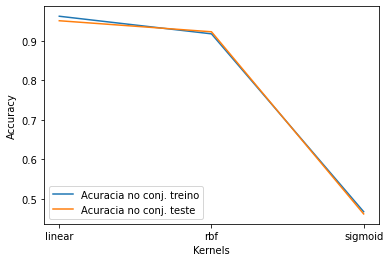

In [12]:
# Lista para armazenar valores de acuracia
training_accuracy = []
test_accuracy = []
# Iterando sobre os tipos de kernel para o svm
kernels = ['linear', 'rbf', 'sigmoid']
for kernel in kernels:
  svm_classifier = svm.SVC(kernel=kernel)
  
  svm_classifier.fit(X_train_cancer, y_train_cancer)
  training_accuracy.append(svm_classifier.score(X_train_cancer, y_train_cancer))
  test_accuracy.append(svm_classifier.score(X_test_cancer, y_test_cancer))
# Visualizando dados pelo matplot
plt.plot(kernels,training_accuracy, label='Acuracia no conj. treino')
plt.plot(kernels,test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Accuracy')
plt.xlabel('Kernels')
plt.legend()

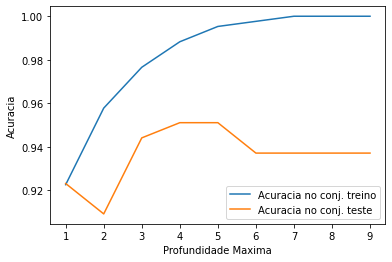

In [13]:
### Usando arvores de decisao
# Lista ara armazenar accuracy
training_accuracy = []
test_accuracy = []
#definindo profundidade da arvore
profundidade_max = range(1,10)

for md in profundidade_max:
  tree = DecisionTreeClassifier(max_depth=md,random_state=0)
  tree.fit(X_train_cancer,y_train_cancer)
  training_accuracy.append(tree.score(X_train_cancer, y_train_cancer))
  test_accuracy.append(tree.score(X_test_cancer, y_test_cancer))

plt.plot(profundidade_max,training_accuracy, label='Acuracia no conj. treino')
plt.plot(profundidade_max,test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('Profundidade Maxima')
plt.legend()